# Machine learning exercises for image detention and prediction   

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
import numpy as np
import sklearn.neural_network
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import multiprocessing
import warnings
warnings.filterwarnings('ignore')

**1.** Write a function show_rgb_instances(X, y) that takes a set of n instances and creates a k × 8 plot grid where k is the necessary number of rows to list all the instances of X (when each row shows 8 instances). Given that there are 3 attributes per pixel (R,G, and B for pixel 1, then R,G, and B for pixel 2, etc., in this order), and that the pictures are quadratic, infer automatically the width (and hence height) w of the images. Then
use numpy.reshape to derive a 4D tensor (n × w × w × 3) from X (you might want to check numpy.transpose as well to orientate the axes properly). Then use plt.imshow to visualize those instances as images (check documentation to see how to plot rgb images). Make sure that there are no axis labels (use ax.set_xticklabels etc.). Use the labels in y as titles for the images.


In [2]:
def prep_rgb_instances(X, y,tam):
    Red, Green, Blue = np.hsplit(X,3)
    Red = Red.reshape(tam,tam)
    Green=Green.reshape(tam,tam)
    Blue =Blue.reshape(tam,tam)
    vista = np.zeros((tam,tam,3))
    for r in range(tam):
        for r2 in range(tam):
            vista[r,r2] =[Red[r,r2],Green[r,r2],Blue[r,r2]]
    return vista.astype(int)

In [3]:
def show_rgb_instances (X,y):
    ncols=8
    #(graphs,_)=np.shape(X)
    graphs=80
    nrows= math.ceil(graphs/ncols)
    fig,ax2d=plt.subplots(nrows,ncols,figsize = (12,12))
    ax=np.ravel(ax2d)
    tam = int(np.sqrt(X.shape[1]/3))
    for i in range(graphs):
        z=prep_rgb_instances(X[i,:], y,tam)
        ax[i].set_axis_off() 
        ax[i].imshow(z)
        ax[i].set_title(int(y[i]))
    fig.tight_layout()
    plt.show()


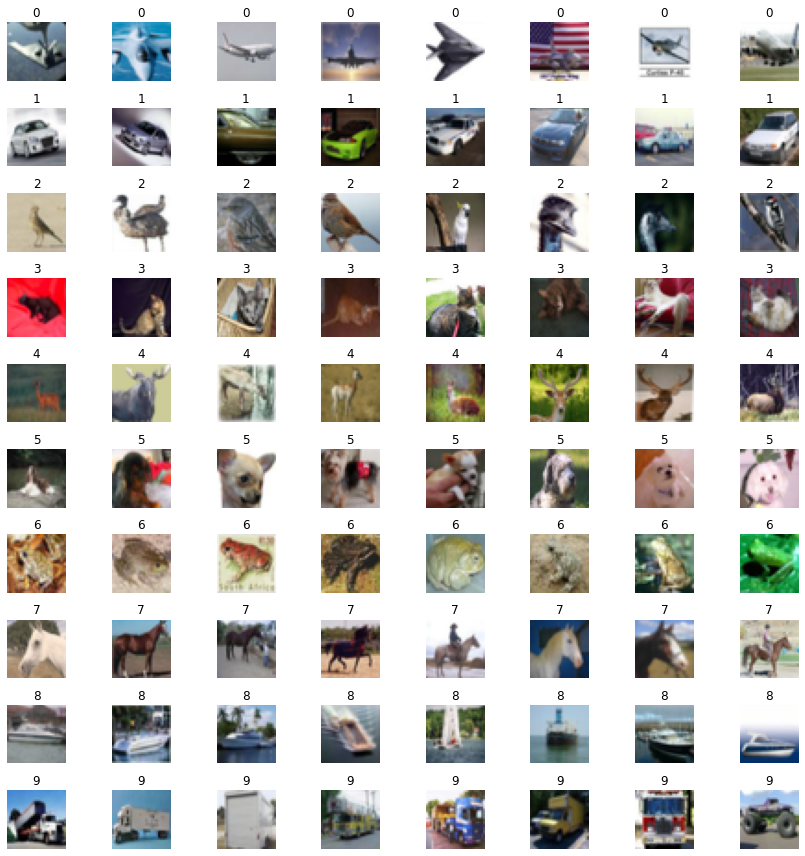

In [5]:
df =pd.read_csv("rgbdata.csv")
y = df.iloc[:,-1].to_numpy()
muestra=pd.DataFrame()
for i in (list(np.unique(y))):
    z=df[df.label.eq(i)].sample(8)
    muestra= pd.concat([muestra, z])
X = muestra.drop(["label"],axis= 1).to_numpy()
y = muestra.iloc[:,-1].to_numpy()
show_rgb_instances (X,y)

#### Exercise 2
Randomly partition the data to stick with 20000 training instances and 5000 validation instances.
In this exercise, never user any of the last 5000 instances during the training process of a network.
Use the scikit-learn MLPClassifier to train 6 different networks with one hidden layer and between
1 and 200 units in this layer: n1 2 f1; 2; 4; 10; 100; 200g. Try learning rates f1; 10􀀀1; ::; 10􀀀6g
and all the available activation functions. This should give in total 6  6  4 = 144 networks.

In [6]:
df =pd.read_csv("rgbdata.csv")
X = df.drop(["label"],axis= 1).to_numpy()
y = df.iloc[:,-1].to_numpy()
X_analysis,x_test, y_analysis,y_test = sklearn.model_selection.train_test_split(X,y,test_size=5000)
X_train,X_valid, y_train,y_valid = sklearn.model_selection.train_test_split(X_analysis,y_analysis,test_size=4000)

In [9]:
def MLPClass(learning, active, hidden):
    curves = []
    dict = []
    start_time = timeit.default_timer()
    mlp = MLPClassifier(solver='adam',
                activation = active,
                hidden_layer_sizes=hidden,
                learning_rate_init= learning,
                max_iter=1,
                warm_start=True)
    mlp.fit(X_train, y_train)
    countMax = 0
    number = 0
    roundCounter = 0
    while number <= 20:
        roundCounter += 1
        mlp.fit(X_train, y_train)
        score = sklearn.metrics.accuracy_score(y_valid,mlp.predict(X_valid))
        print(score)
        curves.append(score)
        if countMax < score:
            countMax = score
            number=0
        else:
            number +=1     
    end_time = timeit.default_timer()
    time = (end_time-start_time)
    dict.append({
    "Score" : countMax,
    "Learning": learning,
    "Hidden": hidden,
    "Activation": active,
    "Epochs": roundCounter,
    "Time": time,
    "Curves": curves})
    
    df_results = pd.DataFrame.from_dict(dict) 
    return df_results

In [11]:
learning_rate_init_ = [1,0.01, 0.001, 0.0001,0.00001,0.000001,0.0000001]
hidden_layer_sizes = [(1), (2), (4),(10),(100),(200)]
activation_ = ['identity', 'logistic', 'tanh','relu']

df_results = pd.DataFrame()

for i in learning_rate_init_:
    for j in activation_:
        for k in hidden_layer_sizes:
            print(i, j, k)
            df_results = pd.concat([df_results,MLPClass(i,j,k)],ignore_index = True)

1 identity 1
0.09825
0.10175
0.1045
0.102
0.10425
0.10075
0.10825
0.0995
0.10225
0.08525
0.08175
0.08975
0.144
0.10125
0.086
0.11375
0.08475
0.095
0.06425
0.08925
0.104
0.10225
0.10475
0.107
0.11725
0.09625
0.1175
0.14775
0.14375
0.084
0.10825
0.0955
0.10075
0.09525
0.0985
0.09475
0.1055
0.10125
0.11125
0.114
0.1365
0.0745
0.14075
0.16025
0.1015
0.09
0.109
0.09875
0.12575
0.10125
0.10325
0.11075
0.10375
0.10175
0.118
0.109
0.0925
0.1
0.10175
0.11075
0.09375
0.14325
0.11275
0.11525
0.09125
1 identity 2
0.13475
0.118
0.13
0.13725
0.11825
0.09775
0.10075
0.132
0.09275
0.09975
0.17975
0.07575
0.083
0.1285
0.123
0.14275
0.1815
0.13925
0.1455
0.102
0.13375
0.127
0.14975
0.116
0.1
0.09525
0.12025
0.1275
0.14575
0.12
0.13725
0.1565
0.161
0.1195
0.14275
0.136
0.09825
0.12425
1 identity 4
0.144
0.13625
0.139
0.1635
0.12575
0.12025
0.177
0.14475
0.1985
0.142
0.181
0.188
0.107
0.111
0.15975
0.20725
0.183
0.124
0.1205
0.119
0.11075
0.12175
0.14925
0.15075
0.11725
0.1275
0.21275
0.1745
0.1695
0.2027

KeyboardInterrupt: 

In [12]:
df_results

,Score,Learning,Hidden,Activation,Epochs,Time,Curves
0,0.16025,1,1,identity,65,123.266183,"[0.09825, 0.10175, 0.1045, 0.102, 0.10425, 0.1..."
1,0.18150,1,2,identity,38,60.831307,"[0.13475, 0.118, 0.13, 0.13725, 0.11825, 0.097..."
2,0.21275,1,4,identity,48,88.262552,"[0.144, 0.13625, 0.139, 0.1635, 0.12575, 0.120..."
3,0.28200,1,10,identity,49,88.555265,"[0.15375, 0.10275, 0.2245, 0.21375, 0.1985, 0...."
4,0.29950,1,100,identity,35,94.299414,"[0.1785, 0.2285, 0.22475, 0.232, 0.22475, 0.17..."
5,0.33775,1,200,identity,64,227.606636,"[0.1555, 0.217, 0.24125, 0.244, 0.1995, 0.2192..."


Text(0, 0.5, 'Score')

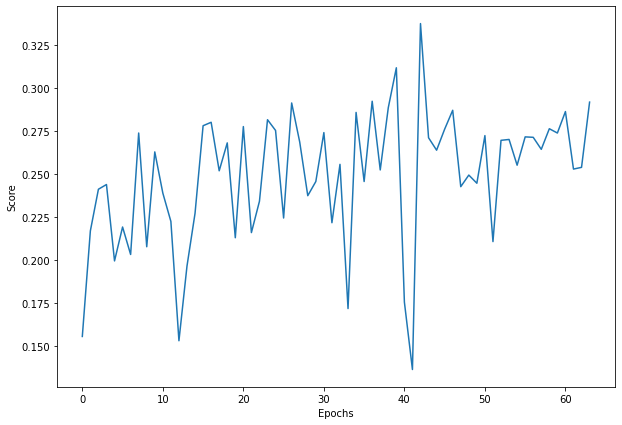

In [13]:
x_axis = list(range(df_results.iloc[df_results['Score'].argmax()]['Epochs']))
y_axis = df_results.iloc[df_results['Score'].argmax()]['Curves']
fig = plt.subplots(figsize = (10,7))
plt.plot(x_axis,y_axis)
plt.xlabel('Epochs')
plt.ylabel('Score')

<AxesSubplot:>

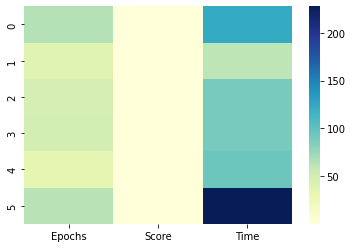

In [14]:
dfheatmap = df_results[['Epochs','Score','Time']]
sns.heatmap(dfheatmap,cmap="YlGnBu")

In [15]:
Learning = df_results.iloc[df_results['Score'].argmax()]['Learning']
Activation = df_results.iloc[df_results['Score'].argmax()]['Activation']
Hidden = df_results.iloc[df_results['Score'].argmax()]['Hidden']

print('The best estimator is learning_rate_init:', Learning ,'activations:',Activation,'hidden_layer_sizes',Hidden)

The best estimator is learning_rate_init: 1 activations: identity hidden_layer_sizes 200


According to the results the best score is below 0.5, therefore we are making mistakes and we should keep training the model or look for a more optimal model that will give us a higher score.

In [16]:
mlp = MLPClassifier(solver='adam',
                activation = Activation,
                hidden_layer_sizes=Hidden,
                learning_rate_init= Learning,
                max_iter=1,
                warm_start=True)
mlp.fit(X_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=200,
              learning_rate_init=1, max_iter=1, warm_start=True)

In [17]:
y_new = mlp.predict(x_test)

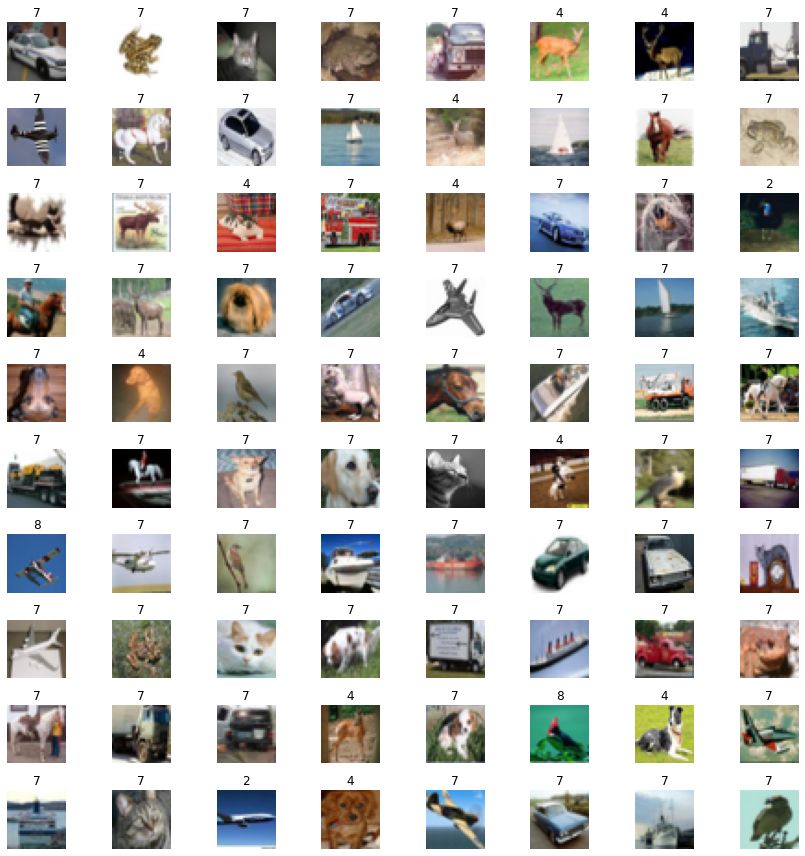

In [18]:
show_rgb_instances(x_test,y_new)